In [1]:
import tensorflow as tf
s = tf.InteractiveSession()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
scalar1 = tf.placeholder("float32")
scalar1_squared = scalar1**2

# A derivative of scalar_squared by scalar1
derivative = tf.gradients(scalar1_squared, [scalar1,])

In [10]:
derivative

[<tf.Tensor 'gradients_2/pow_2_grad/Reshape:0' shape=<unknown> dtype=float32>]

In [14]:
x = np.linspace(-3,3)
x_squared, x_squared_der = s.run([scalar1_squared, derivative[0]],{scalar1:x})

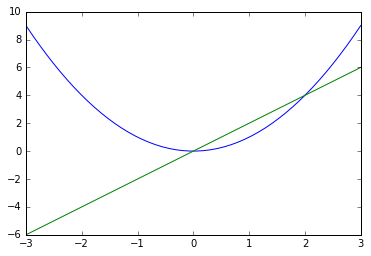

In [16]:
plt.plot(x, x_squared, label = "$x^2$")
plt.plot(x, x_squared_der, label = r"$\frac{dx^2}{dx}$")
plt.legend;

In [17]:

### THE GOOD - complex derivatives


In [22]:
# Compute the gradient of a werd function over scalar1 and vector1
my_vector = tf.placeholder('float32', [None])
weird_function = tf.reduce_mean(
    (my_vector+scalar1)**(1+tf.nn.moments(my_vector,[0])[1]) + 
    1./ tf.atan(scalar1))/(scalar1**2 + 1) + 0.01*tf.sin(
    2*scalar1**1.5)*(tf.reduce_sum(my_vector)* scalar1**2
                      )*tf.exp((scalar1-4)**2)/(
    1+tf.exp((scalar1-4)**2))*(1.-(tf.exp(-(scalar1-4)**2)
                                    )/(1+tf.exp(-(scalar1-4)**2)))**2


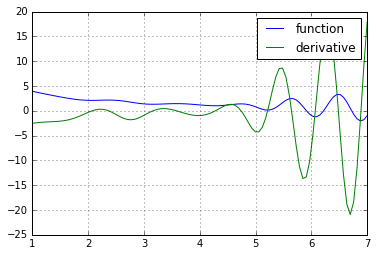

In [31]:
der_by_scalar = tf.gradients(weird_function, scalar1)
der_by_vector = tf.gradients(weird_function, my_vector)
## Plotting the derivative
scalar_space = np.linspace(1, 7, 100)

y = [s.run(weird_function, {scalar1:x, my_vector:[1,2,3]}) for x in scalar_space]
plt.plot(scalar_space, y, label= 'function')

y_der_by_scalar = [s.run(der_by_scalar, {scalar1:x, my_vector:[1,2,3]}) for x in scalar_space]

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid()
plt.legend()